In this notebook, we will apply `TableAutomization.py` file to a simple linear model.

### Importing the needed libraries 

In [1]:
import cuqi
import numpy as np
import os
import sys
sys.path.append(os.path.abspath('..'))
from utilities import TableAutomization as TA
import benchmarksClass as BC 

# Simple Linear Model
We are considering the model:

$$b = x_1 + x_2 + e \;\;\mathrm{with}\;\; e \sim \mathrm{Gaussain}(0, 0.1)$$

We can write it as:

$$b = \mathbf{A}\mathbf{x} + e = \large(1,1\large)\binom{x_1}{x_2} + e$$






<div align="center">

|variable     |    description          |dimension      |
|:------------|:------------------------|:--------------|
|$\mathbf{x}$ |parameter to be inferred |2-dimensional​  |
|$\mathbf{A}$ |forward model            |1-by-2 matrix  |
|$b$          |data                     | 1-dimensional |
|$e$          |noise                    |1-dimensional  ​|

</div>


### inverse problem: given observed data $b$, determine $x_1$, and $x_2$

 

We assume prior as: $$ \mathbf{x} \sim \mathrm{Gaussian}(\mathbf{0}, \delta^2 \mathbf{I}) $$

In [2]:
target_simplest = BC.SimplestBip()

Now we are ready to apply the TableAutomization function to this target distribution ! 

In [3]:
df, (fig, axs) = TA.create_comparison(target_simplest, scale = [1,1,0.1,0.2,1], Ns = 8000, Nb= 2000, seed = 12,chains=3)

Sample 10000 / 10000

Average acceptance rate: 0.239625 

Sample 10000 / 10000

Average acceptance rate all components: 0.357875 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000


In [4]:
TA.print_table(df)

+----------+---------+----------+-------+----------+----------+-------+--------+----------+
|  Method  | Samples | Burn-ins | Scale | ESS(v0)  | ESS(v1)  |   AR  | LogPDF | Gradient |
+----------+---------+----------+-------+----------+----------+-------+--------+----------+
| MH_fixed |   8000  |   2000   |  1.0  | 173.439  | 179.118  |  0.24 | 20000  |    0     |
|   CWMH   |   8000  |   2000   |  1.0  |  73.126  |  73.685  | 0.361 | 39998  |    0     |
|   ULA    |   8000  |   2000   |  0.1  |  95.166  |  93.769  |  1.0  | 20000  |  20000   |
|   MALA   |   8000  |   2000   |  0.2  |  89.202  |  90.928  | 0.489 | 20000  |  20000   |
|   NUTS   |   8000  |   2000   |   -   | 1366.009 | 1354.221 | 0.752 | 108838 |  108838  |
+----------+---------+----------+-------+----------+----------+-------+--------+----------+


_Observations_
- We tuned scale so that acceptance rate is ideal for MH and MALA
- MH sampling outperformed ULA and MALA
- NUTS perfom best but needs large comptuational cost

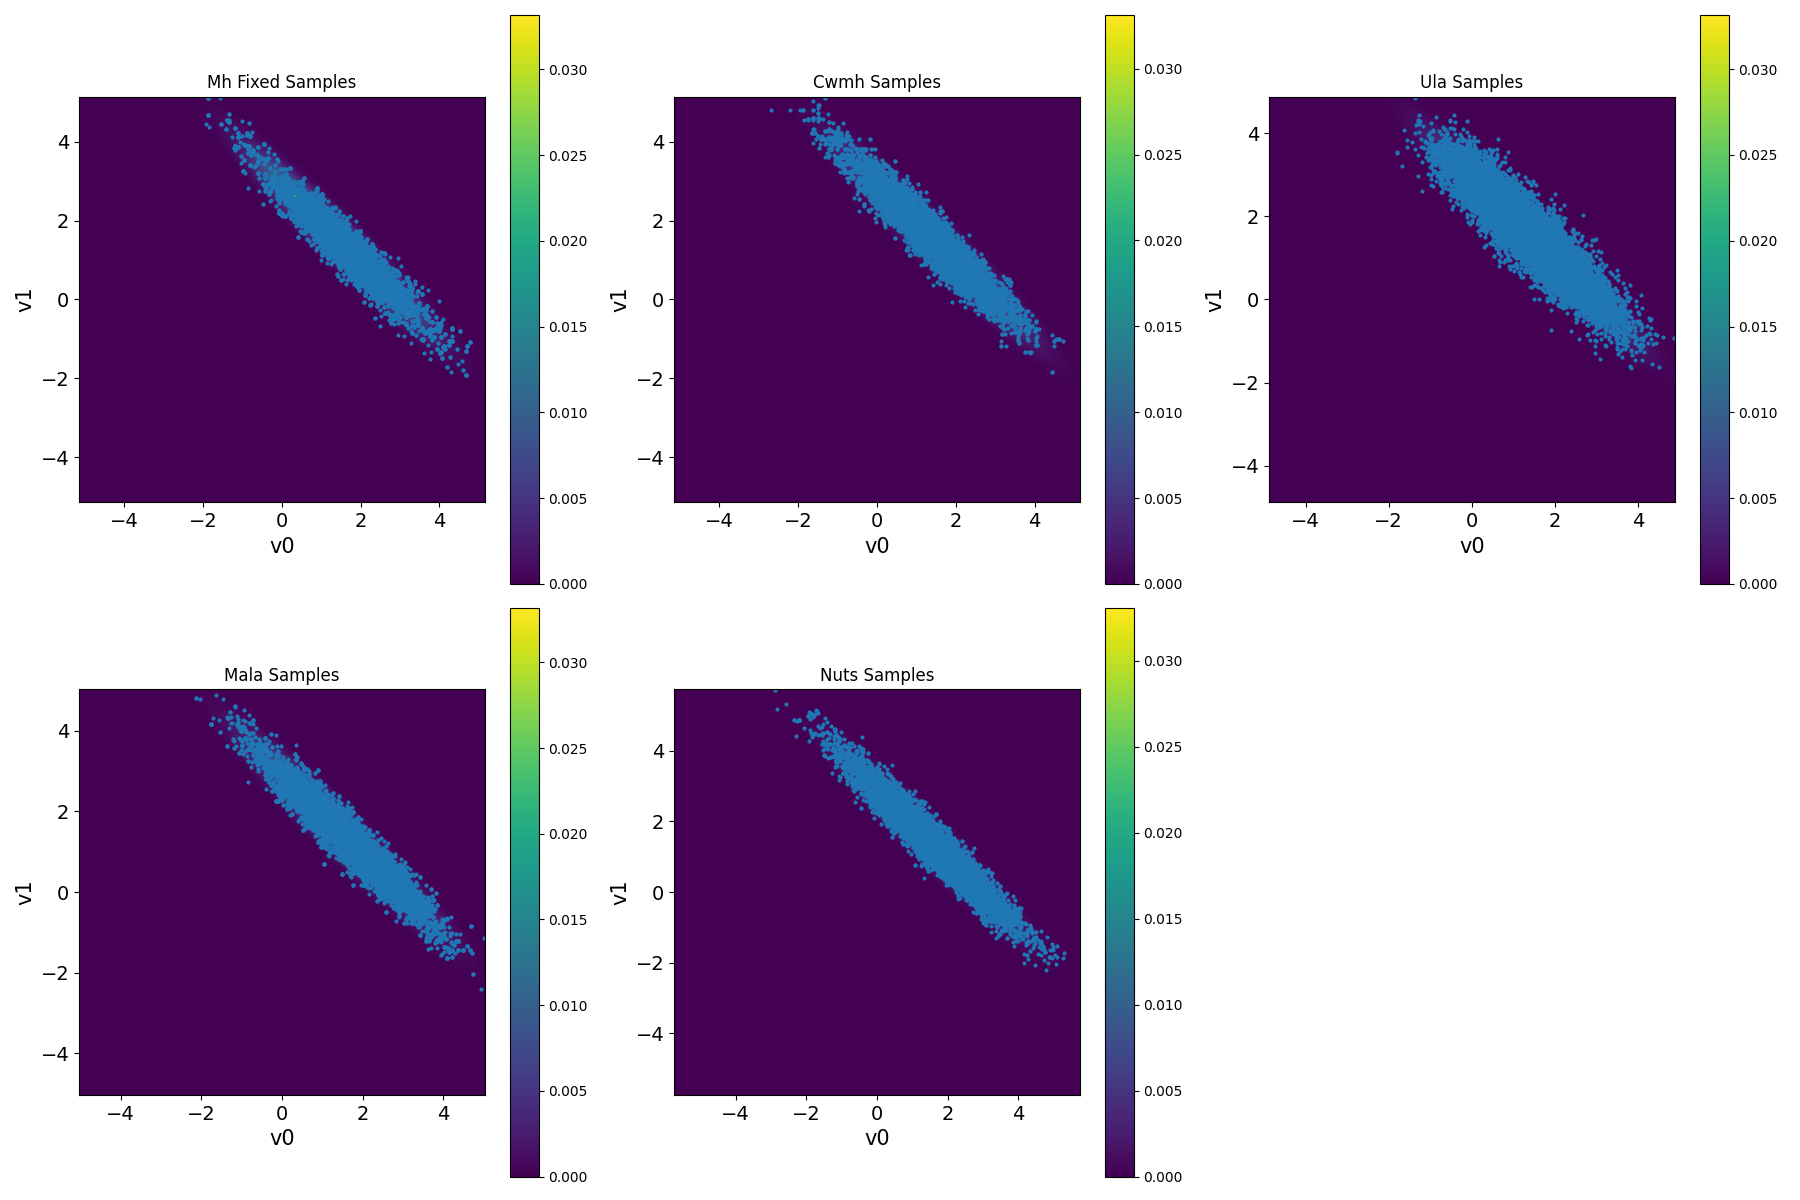

In [5]:
TA.show_plot(fig)

_Observations_

・ULA might be converging to another distributon.